In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
#from pandarallel import pandarallel

In [2]:
customers = pd.read_csv('C:/Users/User/Desktop/case/png_magnit_customers.csv', sep=',')
customers

,customer,customer_age_group,gender,enr_channel,enr_date
0,e0efeacbbbbc72f53a0c,[21 - 25],F,SMS,2019-10-27
1,3211c12941b73356a68e,[36 - 40],F,Mobile App,2019-11-02
2,4c2c6c4175dc9a75e134,[51 and more],U,Mobile App,2019-11-01
3,2698e403385bf0e02553,[31 - 35],F,Mobile App,2019-10-25
4,5580c83260e4a918965e,[26 - 30],F,SMS,2019-10-27
...,...,...,...,...,...
352542,c3300c0dbd7575a5ad87,[41 - 45],F,Customer Web Portal,2019-11-02
352543,3cacc97ad8e40901c267,[36 - 40],M,Mobile App,2020-06-06
352544,e68971c243be971b0f6f,[46 - 50],F,Mobile App,2019-11-02
352545,b7f72643a02f0509ecc7,[46 - 50],F,SMS,2019-11-29


In [3]:
sales = pd.read_csv('C:/Users/User/Desktop/case/png_magnit_purchases.csv', sep=',')
sales

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
0,2021-12-05,46501ab5e1d554f1a40c,Бумажные салфетки,1.0,0.0,0.719656,NaN,2.0,NaN
1,2021-11-29,fe4b24b8d77d1ac3990f,Мыло кусковое,5.0,0.0,-0.612290,NaN,3.0,NaN
2,2021-01-26,ed14e760a20f500bbbeb,Упаковка подарков,1.0,0.0,0.034713,NaN,3.0,NaN
3,2021-12-02,06337c560d6052ab73e4,Соли для душа,1.0,0.0,-0.468906,NaN,3.0,NaN
4,2021-03-03,92d6c8144600df232b8e,Маски для лица,1.0,0.0,4.273955,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...
14441620,2021-04-15,f3d530b8bbf756683e19,Пятновыводители,1.0,0.0,-0.412060,NaN,2.0,NaN
14441621,2021-02-01,eb9f97de02e7687abdd7,Офисные принадлежности,1.0,0.0,0.001694,NaN,4.0,NaN
14441622,2021-05-29,a41fff92e2a893bd541c,Товары для хранения вещей,1.0,0.0,-0.477531,NaN,4.0,NaN
14441623,2021-07-15,28713f03a2d84da58b17,Маски для лица,1.0,0.0,0.522202,NaN,3.0,NaN


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14441625 entries, 0 to 14441624
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   purchase date    object 
 1   customer         object 
 2   product          object 
 3   other_product    float64
 4   p&g_product      float64
 5   cost_product     float64
 6   cost_p&g         float64
 7   product_segment  float64
 8   p&g_segment      float64
dtypes: float64(6), object(3)
memory usage: 991.6+ MB


In [5]:
len(sales['product'].unique())

393

In [6]:
sales.describe()

,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
count,1.444162e+07,1.444162e+07,1.317359e+07,1.367972e+06,1.317359e+07,1.367972e+06
mean,1.100367e+00,1.003803e-01,5.642935e-17,-5.923648e-17,2.931348e+00,2.407568e+00
std,6.960031e-01,3.205961e-01,9.999992e-01,1.000000e+00,6.471386e-01,4.913823e-01
min,0.000000e+00,0.000000e+00,-5.531371e+00,-3.987413e+00,1.000000e+00,2.000000e+00
25%,1.000000e+00,0.000000e+00,-6.347085e-01,-5.928767e-01,3.000000e+00,2.000000e+00
50%,1.000000e+00,0.000000e+00,-2.192748e-01,-2.441679e-01,3.000000e+00,2.000000e+00
75%,1.000000e+00,0.000000e+00,4.043952e-01,3.893598e-01,3.000000e+00,3.000000e+00
max,3.800000e+01,1.100000e+01,1.189054e+02,8.689989e+01,4.000000e+00,3.000000e+00


<AxesSubplot:>

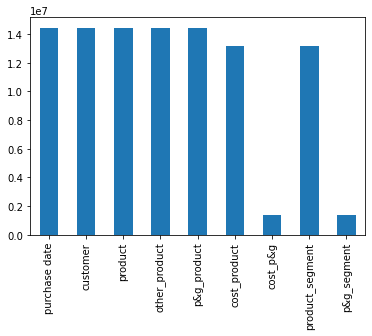

In [7]:
sales.count().plot.bar()

<AxesSubplot:>

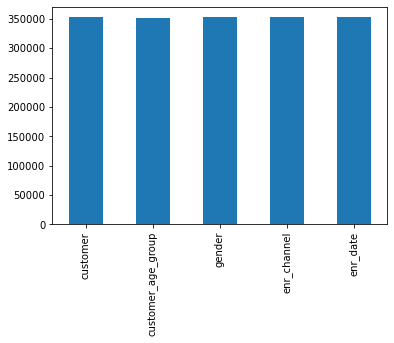

In [8]:
customers.count().plot.bar()

In [9]:
sales.count()

purchase date      14441625
customer           14441625
product            14441625
other_product      14441625
p&g_product        14441625
cost_product       13173586
cost_p&g            1367972
product_segment    13173586
p&g_segment         1367972
dtype: int64

In [10]:
sales['customer'].value_counts()

52e302cf707dd3a6a7a4    1719
fdfe4369ca7361e50422    1697
283ef3c65bc8af9a941a    1510
2d4d298cca6d17f414f6    1487
beb20e478fdffb83485a    1377
                        ... 
0ca68dc90cc4475e9b41       1
3cea1f4d81316703550c       1
4d274cba11a97fcf1ba2       1
5cd75b5470d7758d1ba9       1
15290d824af54661800f       1
Name: customer, Length: 352325, dtype: int64

In [11]:
sales

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
0,2021-12-05,46501ab5e1d554f1a40c,Бумажные салфетки,1.0,0.0,0.719656,NaN,2.0,NaN
1,2021-11-29,fe4b24b8d77d1ac3990f,Мыло кусковое,5.0,0.0,-0.612290,NaN,3.0,NaN
2,2021-01-26,ed14e760a20f500bbbeb,Упаковка подарков,1.0,0.0,0.034713,NaN,3.0,NaN
3,2021-12-02,06337c560d6052ab73e4,Соли для душа,1.0,0.0,-0.468906,NaN,3.0,NaN
4,2021-03-03,92d6c8144600df232b8e,Маски для лица,1.0,0.0,4.273955,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...
14441620,2021-04-15,f3d530b8bbf756683e19,Пятновыводители,1.0,0.0,-0.412060,NaN,2.0,NaN
14441621,2021-02-01,eb9f97de02e7687abdd7,Офисные принадлежности,1.0,0.0,0.001694,NaN,4.0,NaN
14441622,2021-05-29,a41fff92e2a893bd541c,Товары для хранения вещей,1.0,0.0,-0.477531,NaN,4.0,NaN
14441623,2021-07-15,28713f03a2d84da58b17,Маски для лица,1.0,0.0,0.522202,NaN,3.0,NaN


# Предворительная обработка данных

Заполним пропуски нулями

In [12]:
sales = sales.fillna(0)

In [13]:
sales

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
0,2021-12-05,46501ab5e1d554f1a40c,Бумажные салфетки,1.0,0.0,0.719656,0.0,2.0,0.0
1,2021-11-29,fe4b24b8d77d1ac3990f,Мыло кусковое,5.0,0.0,-0.612290,0.0,3.0,0.0
2,2021-01-26,ed14e760a20f500bbbeb,Упаковка подарков,1.0,0.0,0.034713,0.0,3.0,0.0
3,2021-12-02,06337c560d6052ab73e4,Соли для душа,1.0,0.0,-0.468906,0.0,3.0,0.0
4,2021-03-03,92d6c8144600df232b8e,Маски для лица,1.0,0.0,4.273955,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
14441620,2021-04-15,f3d530b8bbf756683e19,Пятновыводители,1.0,0.0,-0.412060,0.0,2.0,0.0
14441621,2021-02-01,eb9f97de02e7687abdd7,Офисные принадлежности,1.0,0.0,0.001694,0.0,4.0,0.0
14441622,2021-05-29,a41fff92e2a893bd541c,Товары для хранения вещей,1.0,0.0,-0.477531,0.0,4.0,0.0
14441623,2021-07-15,28713f03a2d84da58b17,Маски для лица,1.0,0.0,0.522202,0.0,3.0,0.0


Выполним нормализацию столбцов и приведеение типов

In [14]:
sales['purchase date'] = pd.to_datetime(sales['purchase date'])
sales['product'] = sales['product'].astype('category')
'''
sales['other_product'] = (sales['other_product'] - sales['other_product'].min()) / (sales['other_product'].max() - sales['other_product'].min())
sales['p&g_product'] = (sales['p&g_product'] - sales['p&g_product'].min()) / (sales['p&g_product'].max() - sales['p&g_product'].min())
sales['product_segment'] = (sales['product_segment'] - sales['product_segment'].min()) / (sales['product_segment'].max() - sales['product_segment'].min())
sales['p&g_segment'] = (sales['p&g_segment'] - sales['p&g_segment'].min()) / (sales['p&g_segment'].max() - sales['p&g_segment'].min())
'''
sales

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
0,2021-12-05,46501ab5e1d554f1a40c,Бумажные салфетки,1.0,0.0,0.719656,0.0,2.0,0.0
1,2021-11-29,fe4b24b8d77d1ac3990f,Мыло кусковое,5.0,0.0,-0.612290,0.0,3.0,0.0
2,2021-01-26,ed14e760a20f500bbbeb,Упаковка подарков,1.0,0.0,0.034713,0.0,3.0,0.0
3,2021-12-02,06337c560d6052ab73e4,Соли для душа,1.0,0.0,-0.468906,0.0,3.0,0.0
4,2021-03-03,92d6c8144600df232b8e,Маски для лица,1.0,0.0,4.273955,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
14441620,2021-04-15,f3d530b8bbf756683e19,Пятновыводители,1.0,0.0,-0.412060,0.0,2.0,0.0
14441621,2021-02-01,eb9f97de02e7687abdd7,Офисные принадлежности,1.0,0.0,0.001694,0.0,4.0,0.0
14441622,2021-05-29,a41fff92e2a893bd541c,Товары для хранения вещей,1.0,0.0,-0.477531,0.0,4.0,0.0
14441623,2021-07-15,28713f03a2d84da58b17,Маски для лица,1.0,0.0,0.522202,0.0,3.0,0.0


In [15]:
customers

,customer,customer_age_group,gender,enr_channel,enr_date
0,e0efeacbbbbc72f53a0c,[21 - 25],F,SMS,2019-10-27
1,3211c12941b73356a68e,[36 - 40],F,Mobile App,2019-11-02
2,4c2c6c4175dc9a75e134,[51 and more],U,Mobile App,2019-11-01
3,2698e403385bf0e02553,[31 - 35],F,Mobile App,2019-10-25
4,5580c83260e4a918965e,[26 - 30],F,SMS,2019-10-27
...,...,...,...,...,...
352542,c3300c0dbd7575a5ad87,[41 - 45],F,Customer Web Portal,2019-11-02
352543,3cacc97ad8e40901c267,[36 - 40],M,Mobile App,2020-06-06
352544,e68971c243be971b0f6f,[46 - 50],F,Mobile App,2019-11-02
352545,b7f72643a02f0509ecc7,[46 - 50],F,SMS,2019-11-29


In [16]:
customers['customer_age_group'].unique()

array(['[21 - 25]', '[36 - 40]', '[51 and more]', '[31 - 35]',
       '[26 - 30]', '[41 - 45]', '[18 - 20]', '[46 - 50]', nan],
      dtype=object)

In [17]:
customers['customer_age_group'].value_counts(dropna=False)

[51 and more]    79499
[31 - 35]        55574
[36 - 40]        51297
[26 - 30]        44295
[21 - 25]        42398
[41 - 45]        40217
[46 - 50]        29813
[18 - 20]         8858
NaN                596
Name: customer_age_group, dtype: int64

In [18]:
customers_with_nans = customers[customers.isna().any(axis=1)]['customer']
customers_with_nans

4380      8474e611d3c7c71a2eb5
4555      9d7c36a9d5eea2da3a94
5134      52f3ceb11ee554f6dc82
6121      ef3d996bbc4933284f49
6259      348c99605fc1097746e4
                  ...         
351741    45fdb0d7e403e4233fa9
351952    df9b731e8e29a9bef51f
351959    05a93029fb6e433d2786
352038    d6ee8c2543120f4c3696
352102    0470eb4a2ca2ab691a5a
Name: customer, Length: 596, dtype: object

In [19]:
sales_nans_cost = sales[sales['customer'].isin(customers_with_nans)]
sales_nans_cost

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
364,2021-06-12,cdec0d2960e235aacd4f,Сыворотки,1.0,0.0,-1.094284,0.0,3.0,0.0
562,2021-01-19,0afecb79d2226385ffa7,Письменные принадлежности,1.0,0.0,-1.059356,0.0,4.0,0.0
1590,2021-09-20,a44315e4c3d63f28241e,Уход за обувью,1.0,0.0,0.529123,0.0,3.0,0.0
1641,2021-10-15,f97ddaab5b370bb82689,Дезодоранты женские,1.0,0.0,0.800063,0.0,3.0,0.0
1829,2021-04-23,3b12bd577c10e6b2d454,Хозяйственные товары для уборки,1.0,0.0,-0.654438,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
14438205,2021-03-31,64850fcc36c80739acc5,Жидкие средства для стирки,1.0,0.0,0.104148,0.0,2.0,0.0
14438539,2021-01-07,b6abe4f87601dd590c4e,Наборы подарочные косметические женские,1.0,0.0,-0.122167,0.0,2.0,0.0
14440210,2021-12-25,ecfd00bf9d5de0d5b351,Пены для душа,1.0,0.0,1.009419,0.0,3.0,0.0
14440856,2021-07-23,b040e087a9dc2f18f786,Холодные чаи,2.0,0.0,0.058411,0.0,3.0,0.0


In [20]:
sales_nans_cost[sales_nans_cost['p&g_product'] > 0]

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
5098,2021-12-15,b040e087a9dc2f18f786,Прокладки ежедневные,0.0,1.0,0.000000,0.456071,0.0,2.0
5780,2021-10-30,ddbf95e3730a2c58d929,Пасты зубные,0.0,1.0,0.000000,1.207360,0.0,2.0
13526,2021-08-07,86145174ac777bfabdd7,Прокладки,0.0,1.0,0.000000,-0.934910,0.0,2.0
20691,2021-09-07,417ff0061a4ebb09141f,Шампуни,1.0,1.0,0.534939,-0.474454,3.0,3.0
23664,2021-03-15,bbb60d7d757382aba1d7,Жидкие средства для стирки,0.0,1.0,0.000000,0.736447,0.0,2.0
...,...,...,...,...,...,...,...,...,...
14406837,2021-03-23,7dac27838224858dc231,Сухие средства для стирки,0.0,1.0,0.000000,-0.748999,0.0,2.0
14412761,2021-04-28,b040e087a9dc2f18f786,Бритвы и лезвия,0.0,1.0,0.000000,-0.838939,0.0,3.0
14430116,2021-10-31,43202659539ac5b14bd1,Сухие средства для стирки,0.0,1.0,0.000000,2.547516,0.0,2.0
14434772,2021-03-25,7dac27838224858dc231,Прокладки,0.0,1.0,0.000000,-0.045064,0.0,2.0


In [21]:
sales_nans_cost[sales_nans_cost['p&g_product'] > 0].shape[0] / sales[sales['p&g_product'] > 0].shape[0]

0.0016374604158564648

Так как в sales строки с продукцией p&g, у которых в возрасте клиента стоит пропуск не обладают большой значимостью ( их доля в строчках c p&g меньше 0.005), то их можно удалить

In [22]:
sales = sales[~sales['customer'].isin(customers_with_nans)]
customers = customers[~customers['customer'].isin(customers_with_nans)]

In [23]:
customers

,customer,customer_age_group,gender,enr_channel,enr_date
0,e0efeacbbbbc72f53a0c,[21 - 25],F,SMS,2019-10-27
1,3211c12941b73356a68e,[36 - 40],F,Mobile App,2019-11-02
2,4c2c6c4175dc9a75e134,[51 and more],U,Mobile App,2019-11-01
3,2698e403385bf0e02553,[31 - 35],F,Mobile App,2019-10-25
4,5580c83260e4a918965e,[26 - 30],F,SMS,2019-10-27
...,...,...,...,...,...
352542,c3300c0dbd7575a5ad87,[41 - 45],F,Customer Web Portal,2019-11-02
352543,3cacc97ad8e40901c267,[36 - 40],M,Mobile App,2020-06-06
352544,e68971c243be971b0f6f,[46 - 50],F,Mobile App,2019-11-02
352545,b7f72643a02f0509ecc7,[46 - 50],F,SMS,2019-11-29


In [24]:
sales

,purchase date,customer,product,other_product,p&g_product,cost_product,cost_p&g,product_segment,p&g_segment
0,2021-12-05,46501ab5e1d554f1a40c,Бумажные салфетки,1.0,0.0,0.719656,0.0,2.0,0.0
1,2021-11-29,fe4b24b8d77d1ac3990f,Мыло кусковое,5.0,0.0,-0.612290,0.0,3.0,0.0
2,2021-01-26,ed14e760a20f500bbbeb,Упаковка подарков,1.0,0.0,0.034713,0.0,3.0,0.0
3,2021-12-02,06337c560d6052ab73e4,Соли для душа,1.0,0.0,-0.468906,0.0,3.0,0.0
4,2021-03-03,92d6c8144600df232b8e,Маски для лица,1.0,0.0,4.273955,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
14441620,2021-04-15,f3d530b8bbf756683e19,Пятновыводители,1.0,0.0,-0.412060,0.0,2.0,0.0
14441621,2021-02-01,eb9f97de02e7687abdd7,Офисные принадлежности,1.0,0.0,0.001694,0.0,4.0,0.0
14441622,2021-05-29,a41fff92e2a893bd541c,Товары для хранения вещей,1.0,0.0,-0.477531,0.0,4.0,0.0
14441623,2021-07-15,28713f03a2d84da58b17,Маски для лица,1.0,0.0,0.522202,0.0,3.0,0.0


# Создание первичной матрицы кросс-табуляции

In [25]:
sales['product']

0                   Бумажные салфетки
1                       Мыло кусковое
2                   Упаковка подарков
3                       Соли для душа
4                      Маски для лица
                      ...            
14441620              Пятновыводители
14441621       Офисные принадлежности
14441622    Товары для хранения вещей
14441623               Маски для лица
14441624                 Женские гели
Name: product, Length: 14417860, dtype: category
Categories (393, object): ['IT девайсы', 'Автозагары', 'Автозапчасти', 'Автоматические освежители воздуха', ..., 'Электрические лампы', 'Электроинструменты и аксессуары к ним', 'Электромонтаж', 'Энергетические напитки']

In [26]:
products = sales['product'].unique().to_numpy()

In [27]:
cols = ['product', 'other_product', 'p&g_product', 'cost_product', 'cost_p&g']

In [28]:
sales[sales['customer'] == 'eb9f97de02e7687abdd7'][cols]

,product,other_product,p&g_product,cost_product,cost_p&g
47521,Прокладки,2.0,0.0,-0.783747,0.0
779476,Письменные принадлежности,1.0,0.0,0.219832,0.0
794600,Для губ,1.0,0.0,-1.351283,0.0
1007092,Пасты зубные,1.0,0.0,-0.829854,0.0
1476267,Ополаскиватели для белья,1.0,0.0,0.882644,0.0
...,...,...,...,...,...
13711334,Дезодоранты женские,2.0,0.0,-0.775998,0.0
13870342,Прокладки,2.0,0.0,-0.419541,0.0
14227774,Дезодоранты женские,1.0,0.0,0.417988,0.0
14373166,Влажные салфетки,1.0,0.0,1.217801,0.0


In [29]:
f = lambda arr: pd.Series.sum(arr['other_product'] * arr['cost_product'] + arr['p&g_product'] * arr['cost_p&g'])
sales[sales['customer'] == 'eb9f97de02e7687abdd7'][cols].groupby(by='product', as_index='product').apply(f)

product
IT девайсы                               0.000000
Автозагары                               0.000000
Автозапчасти                             0.000000
Автоматические освежители воздуха        0.000000
Автохимия и косметика                    0.000000
                                           ...   
Электрические гирлянды                   0.000000
Электрические лампы                      1.942149
Электроинструменты и аксессуары к ним    0.000000
Электромонтаж                            0.000000
Энергетические напитки                   0.000000
Length: 393, dtype: float64

In [32]:
start_cross_tab = pd.DataFrame(data=np.zeros(shape=(customers.shape[0], products.shape[0]), dtype='float64'), columns=products)
start_cross_tab

,Бумажные салфетки,Мыло кусковое,Упаковка подарков,Соли для душа,Маски для лица,Аэрозольные освежители воздуха,Краска для волос,Тампоны,Чулочно-носочные изделия,Товары для хранения вещей,...,Зимний спортивный инвентарь,Ирригаторы (включая расходные к ним материалы),Бараночные изделия,Вафли,Йогурты питьевые,Бандажи дородовые и послеродовые,Туристическое снаряжение,Одежда для купания,Педикулезные средства,Подарочные наборы
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
start_cross_tab = pd.DataFrame(data=np.zeros(shape=(customers.shape[0], products.shape[0]), dtype='float64'), columns=products)
for index, costumer in enumerate(customers['customer'].iloc[:100]):
    slice_ = sales[sales['customer'] == costumer][cols].groupby(by='product', as_index='product').apply(f)
    start_cross_tab.iloc[index, :] = slice_
start_cross_tab

,Бумажные салфетки,Мыло кусковое,Упаковка подарков,Соли для душа,Маски для лица,Аэрозольные освежители воздуха,Краска для волос,Тампоны,Чулочно-носочные изделия,Товары для хранения вещей,...,Зимний спортивный инвентарь,Ирригаторы (включая расходные к ним материалы),Бараночные изделия,Вафли,Йогурты питьевые,Бандажи дородовые и послеродовые,Туристическое снаряжение,Одежда для купания,Педикулезные средства,Подарочные наборы
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.073664,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.073664,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.474454,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.581544,6.975566,0.0,0.0,0.0,0.0,-1.846248,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.997458,2.229669,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
351947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
351948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
351949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
